In [90]:
import fnmatch

def find_files(path, pattern):
    for root, dirs, files in os.walk(path):
        for file in fnmatch.filter(files, pattern):
            yield os.path.join(root, file)

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def compute_class_distribution(list_tiff, plot=False):
    """
    Computes the class distribution of a NumPy array and optionally plots the results.
    
    Args:
        array (ndarray): The input NumPy array.
        plot (bool): Whether to plot the class distribution or not. Default is False.
        
    Returns:
        dict: A dictionary containing the class distribution, where the keys are the unique
              classes and the values are the corresponding counts.
    """
    
    final_array = np.empty(1)
    
    for tiff in list_tiff:
        # Open the TIFF image using PIL
        image = Image.open(tiff)

        # Convert the image to a NumPy array
        image_array = np.array(image)
    
        # Flatten the array to a 1D array
        flat_array = image_array.ravel()
    
        # Append the current array to final array
        final_array = np.append(final_array, flat_array.ravel())
        
    # Compute the unique classes and their counts
    classes, counts = np.unique(final_array, return_counts=True)

    # Create a dictionary to store the class distribution
    class_distribution = dict(zip(classes, counts))
    
    # Force the output to avoid "null" values in the dataset
    class_distribution = {key:value for (key,value) in class_distribution.items() if key in [1,2,3,4,5,6,7,8,9,10,11,12,13]}

    # Plot the class distribution if requested
    if plot:
        # Create the bar chart
        plt.bar(classes, counts)

        # Add labels and title
        plt.xlabel('Class')
        plt.ylabel('Count')
        plt.title('Class Distribution')
        x = [1,2,3,4,5,6,7,8,9,10,11,12,13]
        default_x_ticks = range(len(x))
        plt.xticks(default_x_ticks, x)
        plt.xlim(0.0, 13.0)

        # Show the plot
        plt.show()
    
    return class_distribution


# Class distribution

## Train distribution

In [92]:
# Get a list of path to train images
train_folder = '/home/tgrippa/project/weak_flair/subset_dataset/train'
train_tupple = [(os.path.split(x)[-1].split('.tif')[0],x) for x in find_files(train_folder, "MSK_*.tif")]
print(f'There are {len(train_tupple)} train images')

There are 2950 train images


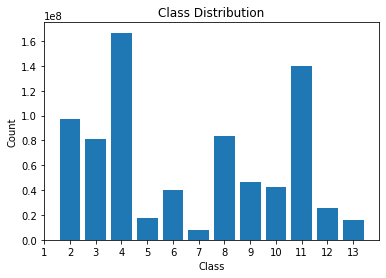

In [94]:
list_tiff = [x[1] for x in train_tupple[:]]
class_distribution = compute_class_distribution(list_tiff, plot=True)

## Test distribution

In [85]:
# Get a list of path to train images
train_folder = '/home/tgrippa/project/weak_flair/subset_dataset/test'
train_tupple = [(os.path.split(x)[-1].split('.tif')[0],x) for x in find_files(train_folder, "MSK_*.tif")]
print(f'There are {len(train_tupple)} test images')

There are 500 test images


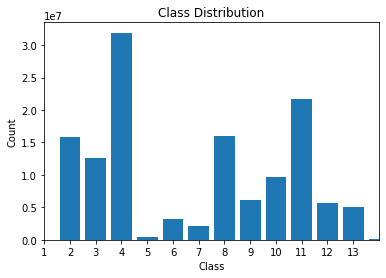

In [86]:
list_tiff = [x[1] for x in train_tupple[:]]
class_distribution = compute_class_distribution(list_tiff, plot=True)

# Class distribution on NDVI

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_curves_from_csv(file_list, class_column, x_column, y_column):
    """
    Reads a list of CSV files containing statistics tables and plots different curves based on the different classes.
    
    Args:
        file_list (list): List of file paths to CSV files.
        class_column (str): Column name containing the classes.
        x_column (str): Column name containing the x-values for the curves.
        y_column (str): Column name containing the y-values for the curves.
    """
    # Create an empty dictionary to store the data frames for each class
    class_data = {}
    
    # Iterate over the file list
    for file in file_list:
        # Read the CSV file into a data frame
        df = pd.read_csv(file)
        
        # Get the unique classes in the class column
        classes = df[class_column].unique()
        
        # Iterate over the classes
        for class_name in classes:
            # Filter the data frame for the current class
            class_df = df[df[class_column] == class_name]
            
            # Retrieve the x and y values for the current class
            x_values = class_df[x_column]
            y_values = class_df[y_column]
            
            # Plot the curve for the current class
            plt.plot(x_values, y_values, label=class_name)
            
            # Store the data frame for the current class
            if class_name in class_data:
                class_data[class_name].append(class_df)
            else:
                class_data[class_name] = [class_df]
    
    # Set the plot title and labels
    plt.title('Curves for Different Classes')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    
    # Display the legend
    plt.legend()
    
    # Show the plot
    plt.show()
    
    # Return the dictionary of data frames for each class
    return class_data


In [96]:
# Get a list of path to train images
train_folder = '/home/tgrippa/project/grass_results/stats'
train_tupple = [(os.path.split(x)[-1].split('.tif')[0],x) for x in find_files(train_folder, "stats_IMG_*.csv")]
print(f'There are {len(train_tupple)} csv')

There are 439 csv


In [ ]:
plot_curves_from_csv(file_list, class_column, x_column, y_column)